# ONE TO ONE

/tmp/ipykernel_111140/3567243759.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


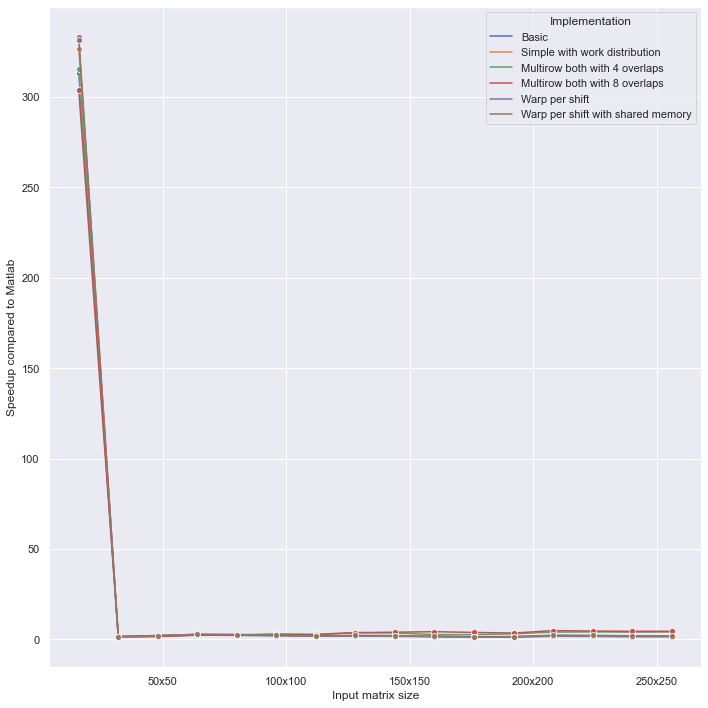

In [18]:
import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

shown_algs_and_args = {
    "matlab": {
        "": "Matlab",
    },
    "basic": {
        "": "Basic",
    },
    "fft_orig": {
        "": "fft"
    },
    "nai_shuffle_multimat_right_work_distribution": {
        "": "Simple with work distribution",
    },
    "nai_shuffle_multirow_both": {
        "4": "Multirow both with 4 overlaps",
        "8": "Multirow both with 8 overlaps"
    },
    "nai_warp_per_shift": {
        "": "Warp per shift"
    },
    "nai_warp_per_shift_shared_mem": {
        "": "Warp per shift with shared memory"
    }
}

def filter_data(row) -> bool:
    return row["Name"] in shown_algs_and_args and row["Args"] in shown_algs_and_args[row["Name"]]



def get_computation_times(benchmark: str):
    benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / benchmark)
    group = benchmark.groups["one_to_one"]


    data = pd.concat([run.data for run in group.runs], axis=0, ignore_index=True)
    data = data[data[["Name", "Args"]].apply(filter_data, axis=1)]

    grouped = data.groupby(["Name", "Args", "Input matrix rows"])

    computation_times = grouped["Computation"].mean() / 1e9
    computation_times.name = "Computation time"
    results = computation_times.reset_index()

    comparison_base_times = results[(results["Name"] == "fft_orig") & (results["Args"] == "")]
    def speedup(row):
        min_time = comparison_base_times[comparison_base_times["Input matrix rows"] == row["Input matrix rows"]]["Computation time"].item()
        return min_time / row["Computation time"]

    def map_name(row):
        return shown_algs_and_args[row["Name"]][row["Args"]]


    results["Speedup"] = results.apply(speedup, axis=1)
    results["Implementation"] = results.apply(map_name, axis=1)
    return results[results["Name"] != "fft_orig"]

matlab_results = get_computation_times("matlab_speedup")
results = get_computation_times("fft_speedup_compute_resolution2")



def scale_speedup_to_matlab(row):
    matlab_speedup = matlab_results[matlab_results["Input matrix rows"] == row["Input matrix rows"]]["Speedup"].item()
    return row["Speedup"] / matlab_speedup

results["Matlab speedup"] = results.apply(scale_speedup_to_matlab, axis=1)


sns.set(rc={'figure.figsize': (10, 10)})
fig, ax = plt.subplots()

ax = sns.lineplot(data=results, x="Input matrix rows", y="Matlab speedup", hue="Implementation", marker='o', ax=ax)
ticks = ax.get_xticks()
ticks = [f"{int(num_rows)}x{int(num_rows)}" for num_rows in ticks]
ax.set_xticklabels(ticks)
ax.set_xlabel("Input matrix size")
ax.set_ylabel(f"Speedup compared to Matlab")
fig.tight_layout()

# ONE TO MANY

/tmp/ipykernel_111140/944780624.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)
/tmp/ipykernel_111140/944780624.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)
/tmp/ipykernel_111140/944780624.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)
/tmp/ipykernel_111140/944780624.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)
/tmp/ipykernel_111140/944780624.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


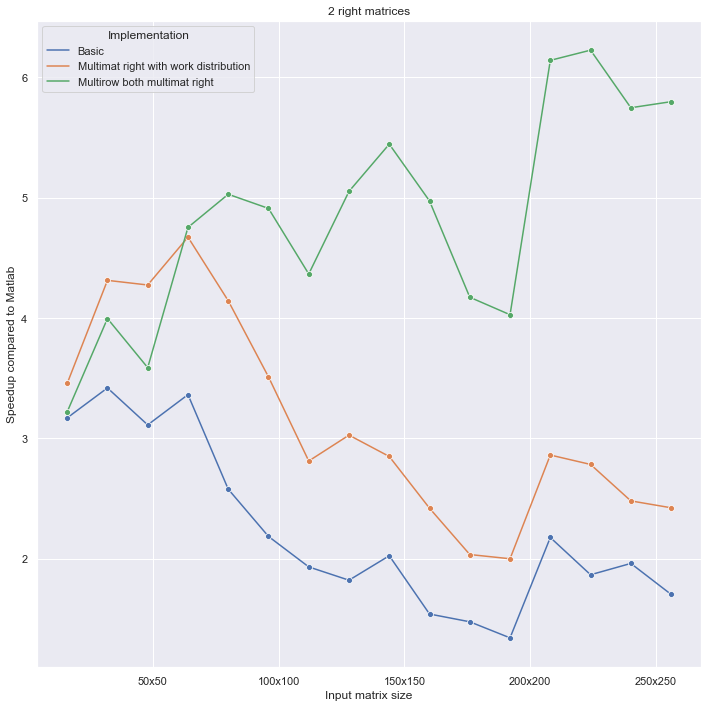

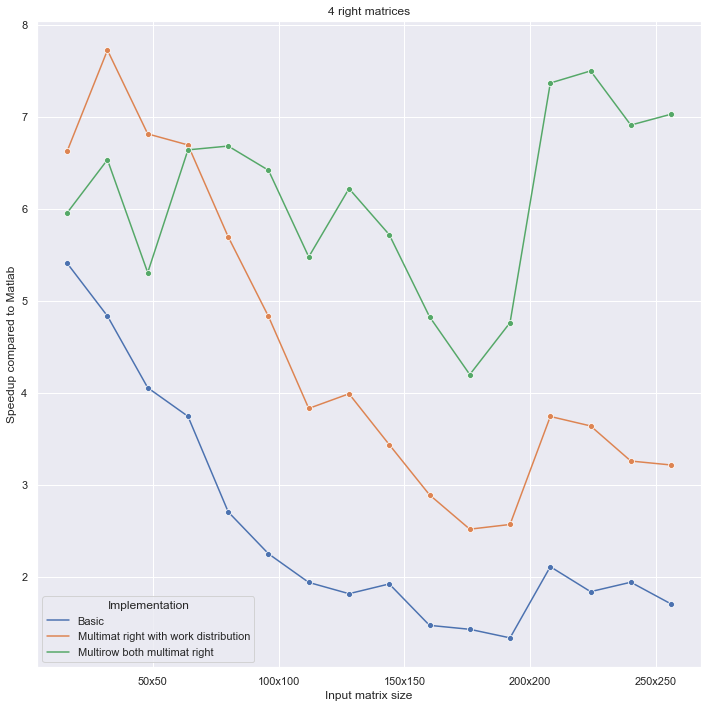

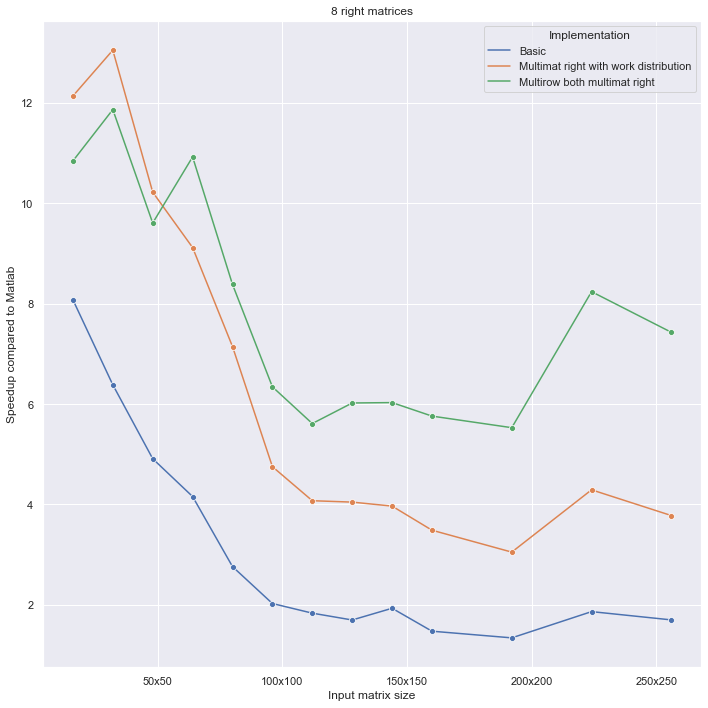

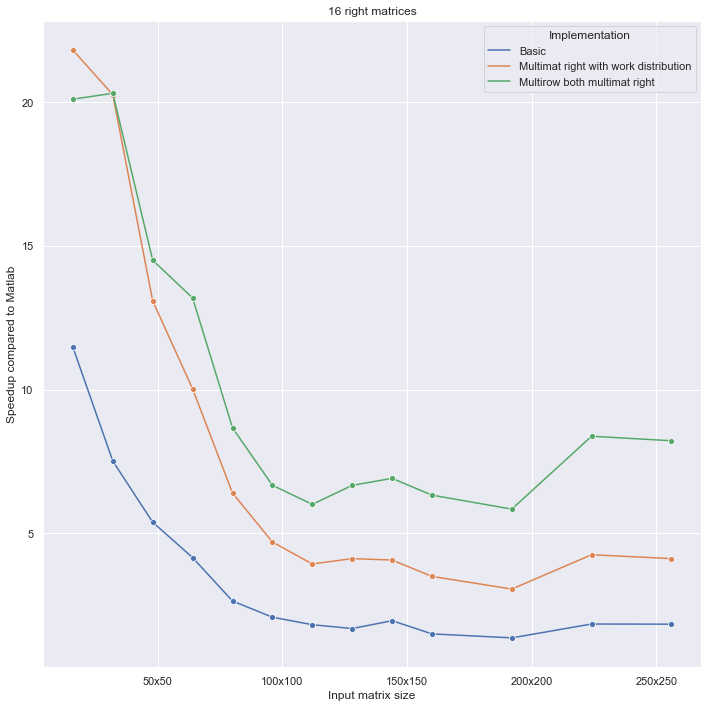

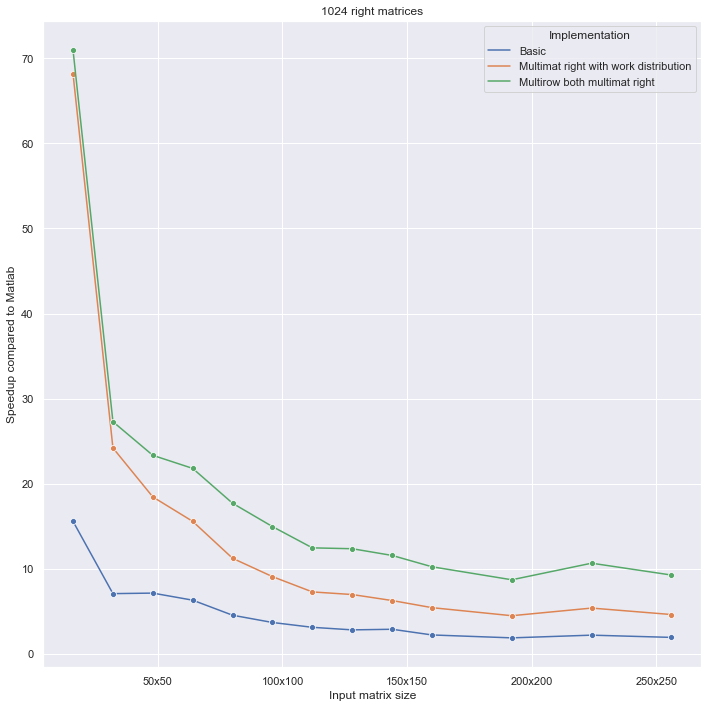

In [21]:
import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

shown_algs_and_args = {
    "matlab": {
        "": "Matlab",
    },
    "basic": {
        "": "Basic",
    },
    "fft_orig": {
        "": "fft"
    },
    "nai_shuffle_multimat_right_work_distribution": {
        "": "Multimat right with work distribution",
    },
    "nai_shuffle_multirow_both_multimat_right": {
        "": "Multirow both multimat right"
    },
}

def filter_data(row) -> bool:
    return row["Name"] in shown_algs_and_args and row["Args"] in shown_algs_and_args[row["Name"]]



def get_computation_times(benchmark: str):
    benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / benchmark)
    group = benchmark.groups["one_to_many"]


    data = pd.concat([run.data for run in group.runs], axis=0, ignore_index=True)
    data = data[data[["Name", "Args"]].apply(filter_data, axis=1)]

    grouped = data.groupby(["Name", "Args", "Input right matrices", "Input matrix rows"])

    computation_times = grouped["Computation"].mean() / 1e9
    computation_times.name = "Computation time"
    results = computation_times.reset_index()

    comparison_base_times = results[(results["Name"] == "fft_orig") & (results["Args"] == "")]
    def speedup(row):
        min_time = comparison_base_times[(comparison_base_times["Input right matrices"] == row["Input right matrices"]) & (
                comparison_base_times["Input matrix rows"] == row["Input matrix rows"])]["Computation time"].item()
        return min_time / row["Computation time"]

    def map_name(row):
        return shown_algs_and_args[row["Name"]][row["Args"]]


    results["Speedup"] = results.apply(speedup, axis=1)
    results["Implementation"] = results.apply(map_name, axis=1)
    return results[results["Name"] != "fft_orig"]
# TODO: Remove
# cols = ["Input right matrices", "Input matrix rows"]
# results = results[results[cols].apply(tuple, axis=1).isin(comparison_base_times[cols].apply(tuple, axis=1))]

# print(results)


matlab_results = get_computation_times("matlab_speedup")
resolution1 = get_computation_times("fft_speedup_compute_resolution")
resolution1 = resolution1[~resolution1["Input right matrices"].isin([2, 4])]
resolution2 = get_computation_times("fft_speedup_compute_resolution2")

results = pd.concat(
    [resolution1, resolution2],
    axis = 0, ignore_index=True
)

def scale_speedup_to_matlab(row):
    matlab_speedup = matlab_results[(matlab_results["Input right matrices"] == row["Input right matrices"]) & (matlab_results["Input matrix rows"] == row["Input matrix rows"])]["Speedup"].item()
    return row["Speedup"] / matlab_speedup

results["Matlab speedup"] = results.apply(scale_speedup_to_matlab, axis=1)


sns.set(rc={'figure.figsize': (10, 10)})
for right_matrices in sorted(results["Input right matrices"].unique()):
    fig, ax = plt.subplots()
    r_mat_results = results[results["Input right matrices"] == right_matrices]
    ax = sns.lineplot(data=r_mat_results, x="Input matrix rows", y="Matlab speedup", hue="Implementation", marker='o', ax=ax)
    ticks = ax.get_xticks()
    ticks = [f"{int(num_rows)}x{int(num_rows)}" for num_rows in ticks]
    ax.set_xticklabels(ticks)
    ax.set_xlabel("Input matrix size")
    ax.set_ylabel(f"Speedup compared to Matlab")
    ax.set_title(f"{right_matrices} right matrices")
    fig.tight_layout()

# N TO MN

/tmp/ipykernel_111140/1032144266.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)
/tmp/ipykernel_111140/1032144266.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)
/tmp/ipykernel_111140/1032144266.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)
/tmp/ipykernel_111140/1032144266.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


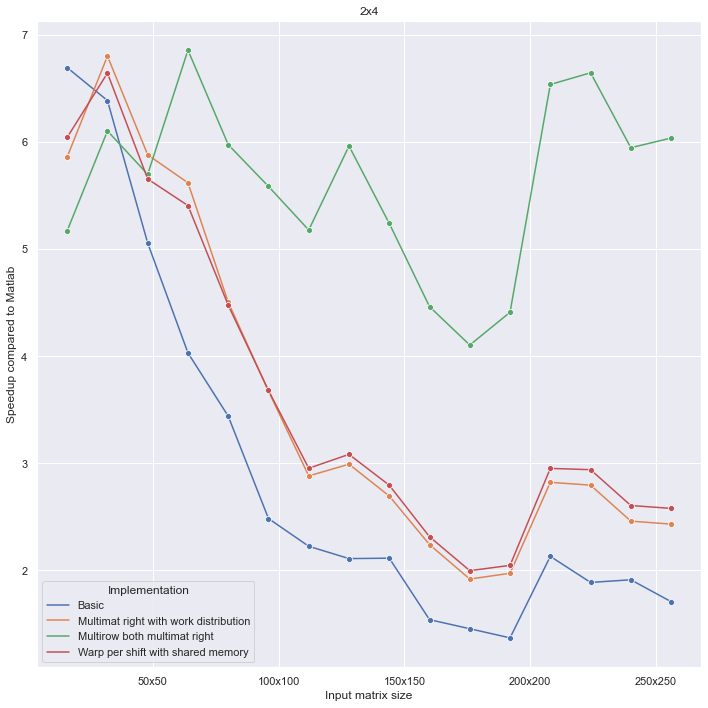

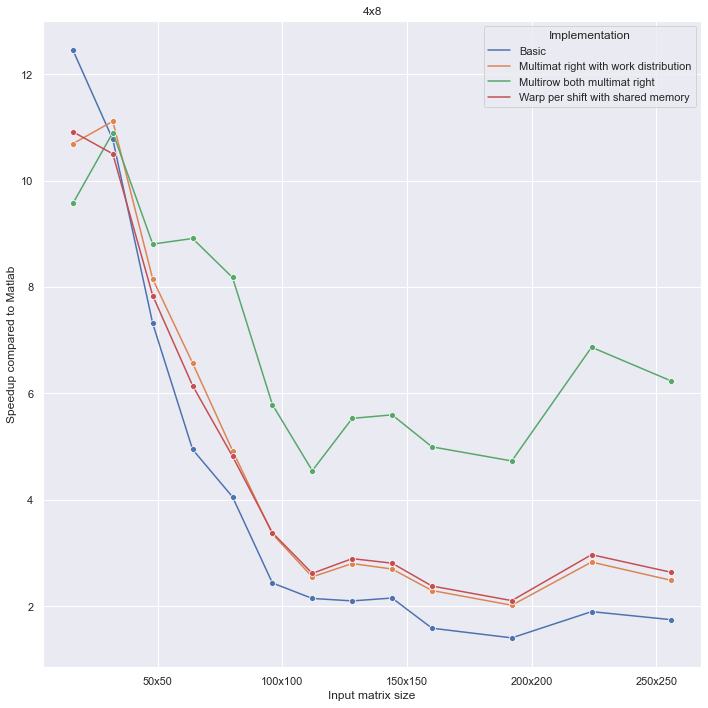

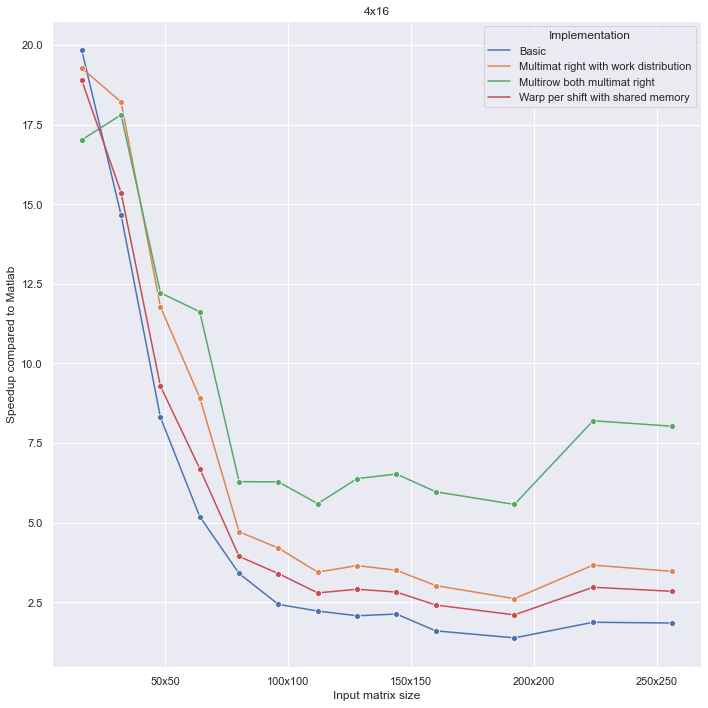

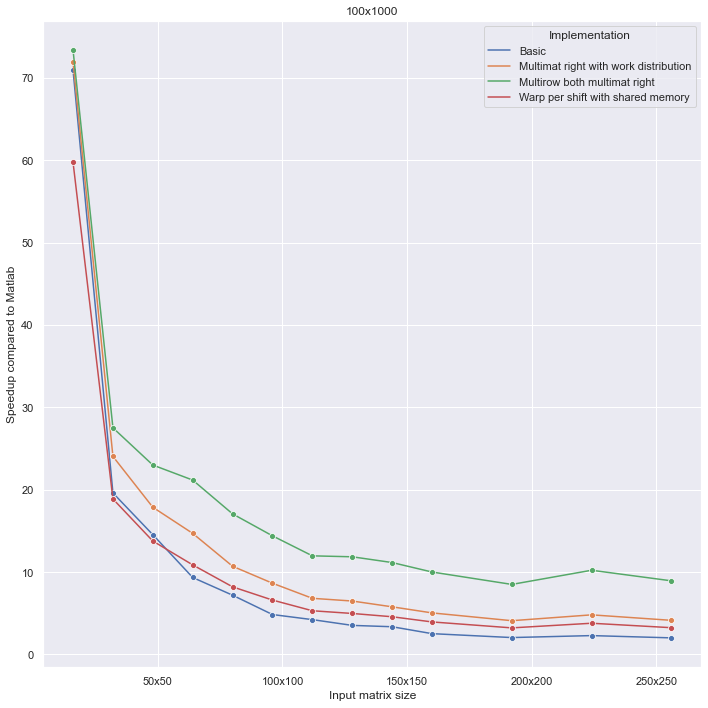

In [20]:
import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

shown_algs_and_args = {
    "matlab": {
        "": "Matlab",
    },
    "basic": {
        "": "Basic",
    },
    "fft_orig": {
        "": "fft"
    },
    "nai_shuffle_multimat_right_work_distribution": {
        "": "Multimat right with work distribution",
    },
    "nai_shuffle_multirow_both_multimat_right": {
        "": "Multirow both multimat right"
    },
    "nai_warp_per_shift_shared_mem": {
        "": "Warp per shift with shared memory"
    },
}

def filter_data(row) -> bool:
    return row["Name"] in shown_algs_and_args and row["Args"] in shown_algs_and_args[row["Name"]]



def get_computation_times(benchmark: str):
    benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / benchmark)
    group = benchmark.groups["n_to_mn"]

    data = pd.concat([run.data for run in group.runs], axis=0, ignore_index=True)
    data = data[data[["Name", "Args"]].apply(filter_data, axis=1)]

    grouped = data.groupby(["Name", "Args", "Input left matrices", "Input right matrices", "Input matrix rows"])

    computation_times = grouped["Computation"].mean() / 1e9
    computation_times.name = "Computation time"
    results = computation_times.reset_index()

    comparison_base_times = results[(results["Name"] == "fft_orig") & (results["Args"] == "")]
    def speedup(row):
        min_time = comparison_base_times[(comparison_base_times["Input left matrices"] == row["Input left matrices"]) & (comparison_base_times["Input right matrices"] == row["Input right matrices"]) & (comparison_base_times["Input matrix rows"] == row["Input matrix rows"])]["Computation time"].item()
        return min_time / row["Computation time"]

    def map_name(row):
        return shown_algs_and_args[row["Name"]][row["Args"]]


    results["Speedup"] = results.apply(speedup, axis=1)
    results["Implementation"] = results.apply(map_name, axis=1)
    return results[results["Name"] != "fft_orig"]
# TODO: Remove
# cols = ["Input right matrices", "Input matrix rows"]
# results = results[results[cols].apply(tuple, axis=1).isin(comparison_base_times[cols].apply(tuple, axis=1))]

# print(results)


matlab_results = get_computation_times("matlab_speedup")
resolution1 = get_computation_times("fft_speedup_compute_resolution")
resolution1 = resolution1[(resolution1["Input left matrices"] != 2) & (resolution1["Input right matrices"] != 4)]
resolution2 = get_computation_times("fft_speedup_compute_resolution2")

results = pd.concat(
    [resolution1, resolution2],
    axis = 0, ignore_index=True
)

def scale_speedup_to_matlab(row):
    matlab_speedup = matlab_results[(matlab_results["Input left matrices"] == row["Input left matrices"]) & (matlab_results["Input right matrices"] == row["Input right matrices"]) & (matlab_results["Input matrix rows"] == row["Input matrix rows"])]["Speedup"].item()
    return row["Speedup"] / matlab_speedup

results["Matlab speedup"] = results.apply(scale_speedup_to_matlab, axis=1)

sns.set(rc={'figure.figsize': (10, 10)})
for left_matrices in sorted(results["Input left matrices"].unique()):
    l_mat_results = results[results["Input left matrices"] == left_matrices]
    for right_matrices in sorted(l_mat_results["Input right matrices"].unique()):
        fig, ax = plt.subplots()
        r_mat_results = l_mat_results[l_mat_results["Input right matrices"] == right_matrices]
        ax = sns.lineplot(data=r_mat_results, x="Input matrix rows", y="Matlab speedup", hue="Implementation", marker='o', ax=ax)
        ticks = ax.get_xticks()
        ticks = [f"{int(num_rows)}x{int(num_rows)}" for num_rows in ticks]
        ax.set_xticklabels(ticks)
        ax.set_xlabel("Input matrix size")
        ax.set_ylabel(f"Speedup compared to Matlab")
        ax.set_title(f"{left_matrices}x{right_matrices}")
        fig.tight_layout()
        #fig.savefig("warp_shuffle_against_basic.svg", format="svg")

# N TO M

/tmp/ipykernel_111140/2705623999.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)
/tmp/ipykernel_111140/2705623999.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)
/tmp/ipykernel_111140/2705623999.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)
/tmp/ipykernel_111140/2705623999.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


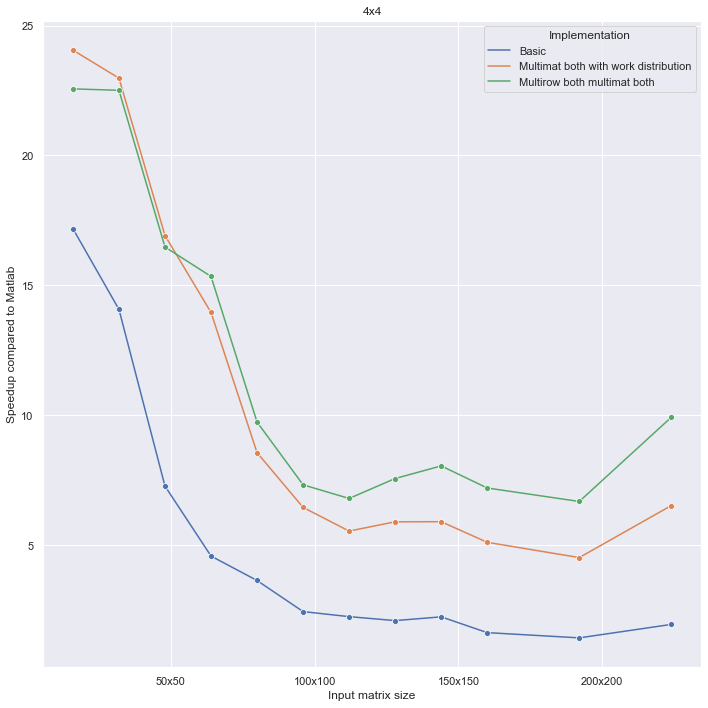

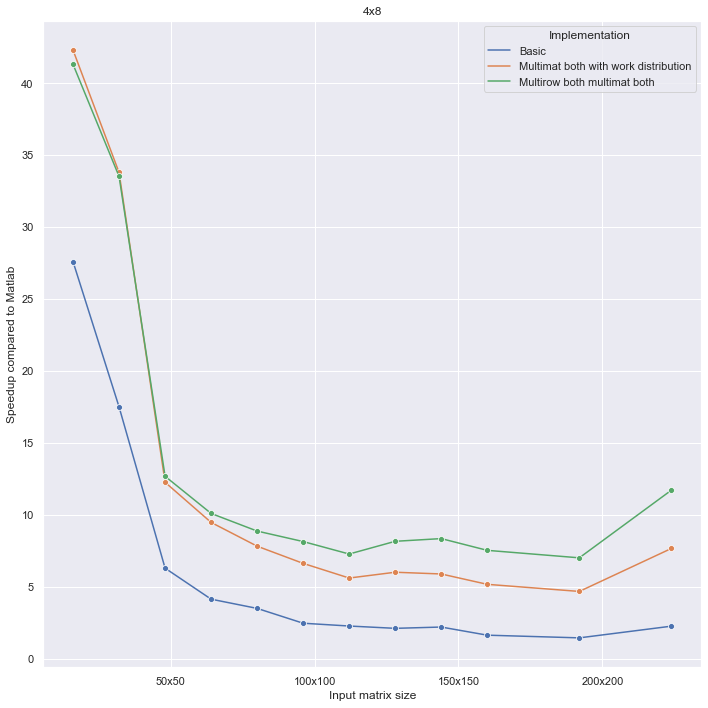

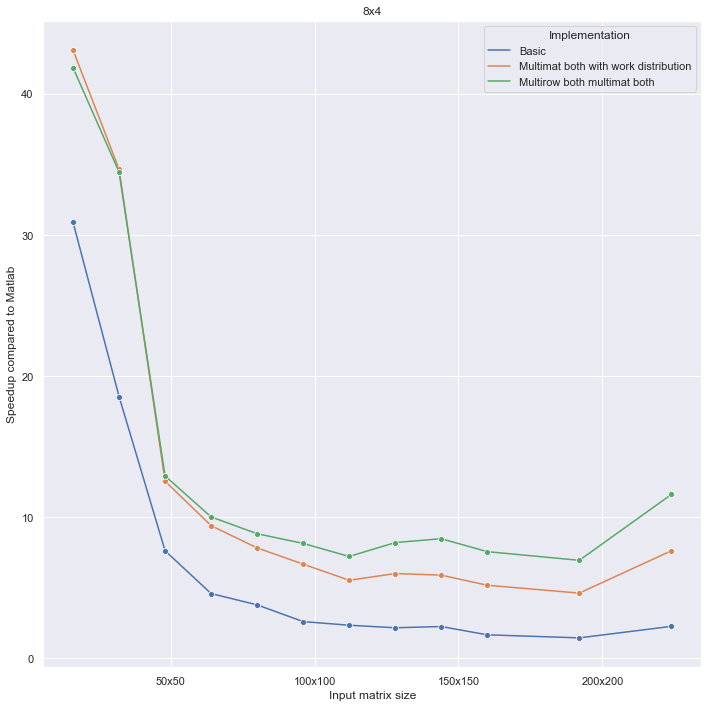

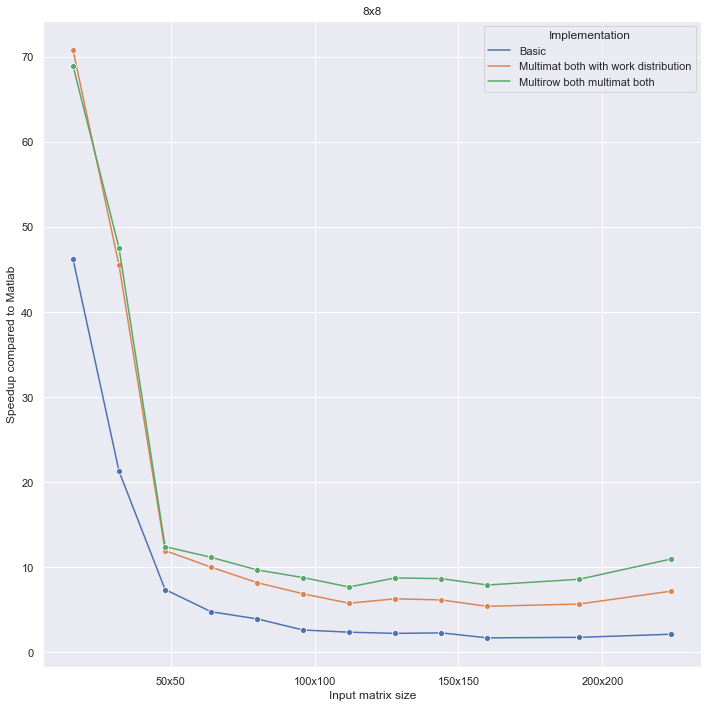

In [19]:
import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

shown_algs_and_args = {
    "matlab": {
        "": "Matlab",
    },
    "basic": {
        "": "Basic",
    },
    "fft_orig": {
        "": "fft"
    },
    "nai_shuffle_multimat_both_work_distribution": {
        "": "Multimat both with work distribution"
    },
    "nai_shuffle_multirow_both_multimat_both": {
        "": "Multirow both multimat both"
    },
    "nai_shuffle_multirow_both_multimat_both_large": {
        "": "Multirow both multimat both large"
    }
}

def filter_data(row) -> bool:
    return row["Name"] in shown_algs_and_args and row["Args"] in shown_algs_and_args[row["Name"]]


def get_computation_times(benchmark: str):
    benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / benchmark)
    group = benchmark.groups["n_to_m"]

    data = pd.concat([run.data for run in group.runs], axis=0, ignore_index=True)
    data = data[(data["Input left matrices"] != 50) & (data["Input matrix rows"] < 256) & (data[["Name", "Args"]].apply(filter_data, axis=1))]

    grouped = data.groupby(["Name", "Args", "Input left matrices", "Input right matrices", "Input matrix rows"])

    computation_times = grouped["Computation"].mean() / 1e9
    computation_times.name = "Computation time"
    results = computation_times.reset_index()

    comparison_base_times = results[(results["Name"] == "fft_orig") & (results["Args"] == "")]
    def speedup(row):
        min_time = comparison_base_times[(comparison_base_times["Input left matrices"] == row["Input left matrices"]) & (comparison_base_times["Input right matrices"] == row["Input right matrices"]) & (comparison_base_times["Input matrix rows"] == row["Input matrix rows"])]["Computation time"].item()
        return min_time / row["Computation time"]

    def map_name(row):
        return shown_algs_and_args[row["Name"]][row["Args"]]


    results["Speedup"] = results.apply(speedup, axis=1)
    results["Implementation"] = results.apply(map_name, axis=1)
    return results[results["Name"] != "fft_orig"]
# TODO: Remove
# cols = ["Input right matrices", "Input matrix rows"]
# results = results[results[cols].apply(tuple, axis=1).isin(comparison_base_times[cols].apply(tuple, axis=1))]

# print(results)


matlab_results = get_computation_times("matlab_speedup")

results = get_computation_times("fft_speedup_compute_resolution2")

def scale_speedup_to_matlab(row):
    matlab_speedup = matlab_results[(matlab_results["Input left matrices"] == row["Input left matrices"]) & (matlab_results["Input right matrices"] == row["Input right matrices"]) & (matlab_results["Input matrix rows"] == row["Input matrix rows"])]["Speedup"].item()
    return row["Speedup"] / matlab_speedup

results["Matlab speedup"] = results.apply(scale_speedup_to_matlab, axis=1)

sns.set(rc={'figure.figsize': (10, 10)})
for left_matrices in sorted(results["Input left matrices"].unique()):
    l_mat_results = results[results["Input left matrices"] == left_matrices]
    for right_matrices in sorted(l_mat_results["Input right matrices"].unique()):
        fig, ax = plt.subplots()
        r_mat_results = l_mat_results[l_mat_results["Input right matrices"] == right_matrices]
        ax = sns.lineplot(data=r_mat_results, x="Input matrix rows", y="Matlab speedup", hue="Implementation", marker='o', ax=ax)
        ticks = ax.get_xticks()
        ticks = [f"{int(num_rows)}x{int(num_rows)}" for num_rows in ticks]
        ax.set_xticklabels(ticks)
        ax.set_xlabel("Input matrix size")
        ax.set_ylabel(f"Speedup compared to Matlab")
        ax.set_title(f"{left_matrices}x{right_matrices}")
        fig.tight_layout()
        #fig.savefig("warp_shuffle_against_basic.svg", format="svg")